In [1]:
import keras
from keras.utils import to_categorical
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
import keras_tuner

import matplotlib.pyplot as plt

2025-10-21 08:58:47.872737: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train_src, y_train), (X_test_src, y_test) = cifar10.load_data()


In [3]:
X_train = tf.cast(X_train_src, tf.float32) / 255.0
X_test = tf.cast(X_test_src, tf.float32) / 255.0

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

input_shape = X_train.shape[1:]

In [4]:
cnn = keras.Sequential()

cnn.add(
    layer=layers.Input(shape=input_shape)
)

cnn.add(
    layer=layers.Conv2D(filters=32, kernel_size=3, activation='relu')
)


cnn.add(
    layer=layers.MaxPool2D(pool_size=2, strides=2)
)


cnn.add(
    layer=layers.Conv2D(filters=64, kernel_size=3, activation='relu')
)
cnn.add(
    layer=layers.MaxPool2D(pool_size=2, strides=2)
)



cnn.add(
    layer=layers.Flatten()
)
cnn.add(
    layer=layers.Dense(units=256, activation='relu')
)
cnn.add(
    layer=layers.Dropout(.5)
)

cnn.add(
    layer=layers.Dense(units=10, activation='softmax')
)

cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=.001), 
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,042 (2.33 MB)

 Trainable params: 612,042 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
cnn.fit(X_train, y_train, batch_size=128, epochs=25, validation_split=.2)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - categorical_accuracy: 0.4055 - loss: 1.6362 - val_categorical_accuracy: 0.5334 - val_loss: 1.3176
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - categorical_accuracy: 0.5383 - loss: 1.3006 - val_categorical_accuracy: 0.5857 - val_loss: 1.1787
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - categorical_accuracy: 0.5925 - loss: 1.1572 - val_categorical_accuracy: 0.6361 - val_loss: 1.0470
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - categorical_accuracy: 0.6260 - loss: 1.0692 - val_categorical_accuracy: 0.6530 - val_loss: 0.9966
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - categorical_accuracy: 0.6472 - loss: 1.0022 - val_categorical_accuracy: 0.6519 - val_loss: 0.9939
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - categorical_accuracy: 0.6701 - loss: 0.9460 - val_categorical_accuracy: 0.6587 - val_loss: 0.9803
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - categorical_accuracy

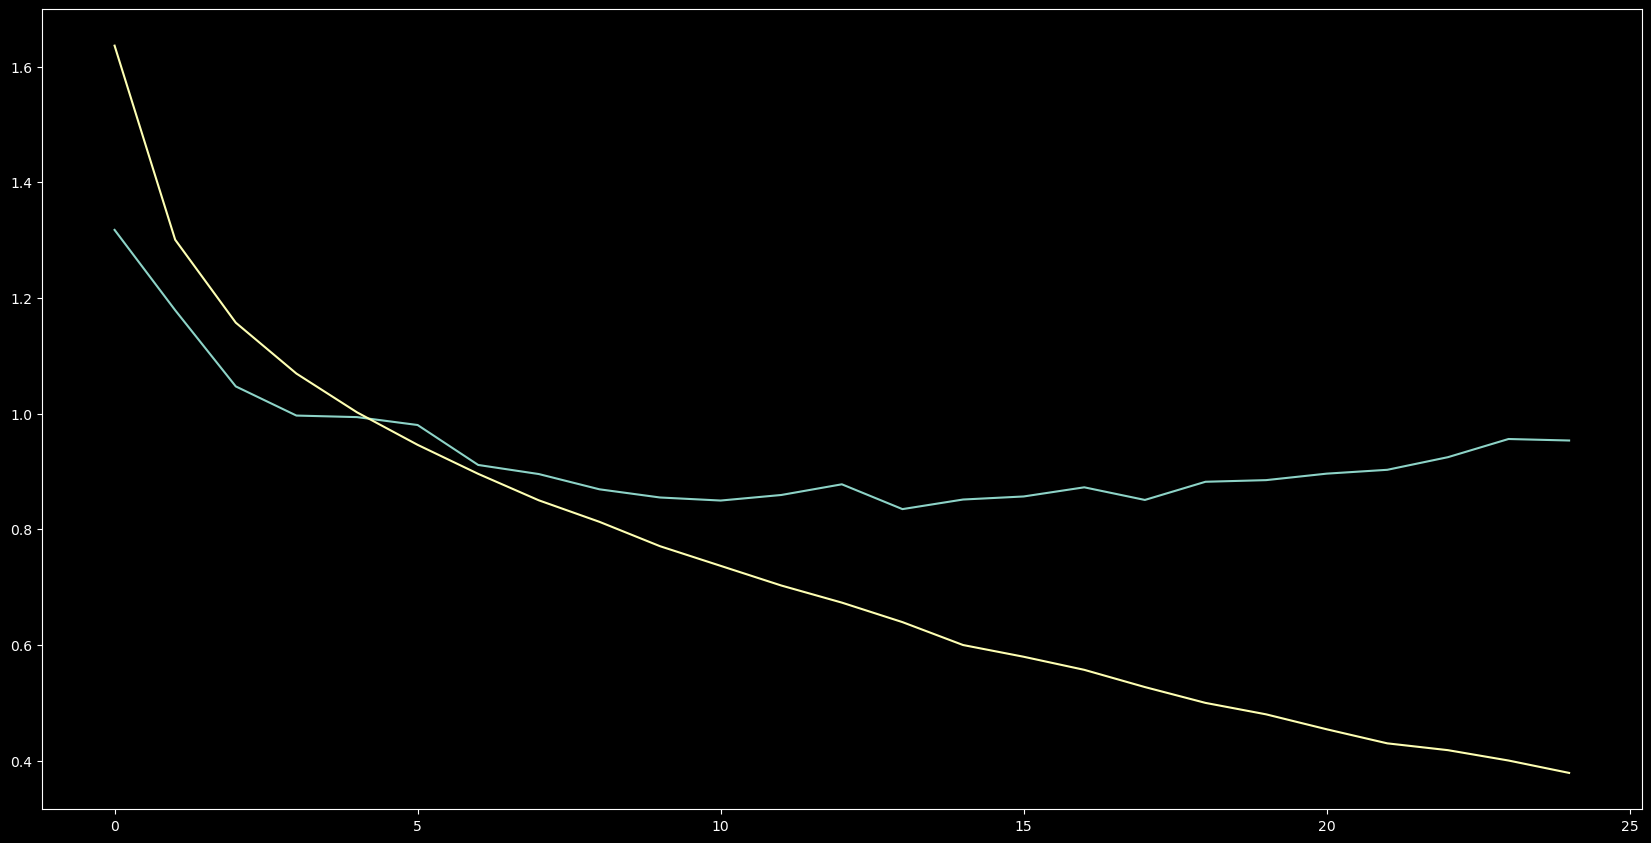

In [6]:
history = cnn.history


fig = plt.figure(figsize=(16, 8))

ax = fig.add_axes(rect=(0,0,1,1))

ax.plot(history.history['val_loss'])
ax.plot(history.history['loss'])

In [7]:
test_loss, test_metric = cnn.evaluate(X_test, y_test)

print(test_loss, test_metric)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.7139 - loss: 0.9675
0.9675236344337463 0.7139000296592712


In [8]:

def build_model(hp):
    cnn = keras.Sequential()
    cnn.add(layer=layers.Input(shape=input_shape))
    
    n_conv_pool = hp.Int('num_conv_pool_layers', min_value=1, max_value=2, step=1)
    
    for i in range(n_conv_pool):
        cnn.add(layer=layers.Conv2D(filters=hp.Int(f'filters_{i}', min_value=8, max_value=32, step=8), 
                                    kernel_size=hp.Int(f'kernel_size_{i}', min_value=2, max_value=4, step=1), 
                                    activation='relu'))
        cnn.add(layer=layers.MaxPool2D(pool_size=2, strides=2))
    
    cnn.add(layer=layers.Flatten())
    
    n_dense_layer = hp.Int('num_dense_layers', min_value=1, max_value=2, step=1)
    
    
    for i in range(n_dense_layer):
        cnn.add(layer=layers.Dense(units=256, activation='relu'))
        
        if hp.Boolean(f'dropout_{i}', default=False):
            cnn.Dropout(hp.Float(f'dropout_rate{i}', min_value=.1, max_value=.5))
    
    cnn.add(layer=layers.Dense(units=10, activation='softmax'))

    cnn.compile(
        optimizer=keras.optimizers.Adam(learning_rate=.001), 
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=[keras.metrics.CategoricalAccuracy()]
    )
    
    return cnn

In [12]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner = keras_tuner.BayesianOptimization(
    build_model,
    objective=keras_tuner.Objective(name='val_loss', direction='min'),
    max_trials=200,
    seed=42
)

tuner.search(X_train, y_train, epochs=20, validation_split=.2, callbacks=[early_stop])
best_hp = tuner.get_best_hyperparameters()[0]
best_model = build_model(best_hp)
best_model.summary()

Trial 200 Complete [00h 02m 51s]
val_loss: 1.0963181257247925

Best val_loss So Far: 1.032400369644165
Total elapsed time: 7d 17h 56m 28s


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 8)      │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 8)      │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       100,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,546 (404.48 KB)

 Trainable params: 103,546 (404.48 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
best_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_split=.2)


Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - categorical_accuracy: 0.3697 - loss: 1.7587 - val_categorical_accuracy: 0.4345 - val_loss: 1.5630
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - categorical_accuracy: 0.4707 - loss: 1.4773 - val_categorical_accuracy: 0.4867 - val_loss: 1.4438
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - categorical_accuracy: 0.5124 - loss: 1.3722 - val_categorical_accuracy: 0.5154 - val_loss: 1.3634
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - categorical_accuracy: 0.5408 - loss: 1.2923 - val_categorical_accuracy: 0.5412 - val_loss: 1.2994
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - categorical_accuracy: 0.5667 - loss: 1.2276 - val_categorical_accuracy: 0.5525 - val_loss: 1.2758
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - categorical_accuracy: 0.5836 - loss: 1.1793 - val_categorical_accuracy: 0.5762 - val_loss: 1.2098
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - categorical_accuracy: 0.6

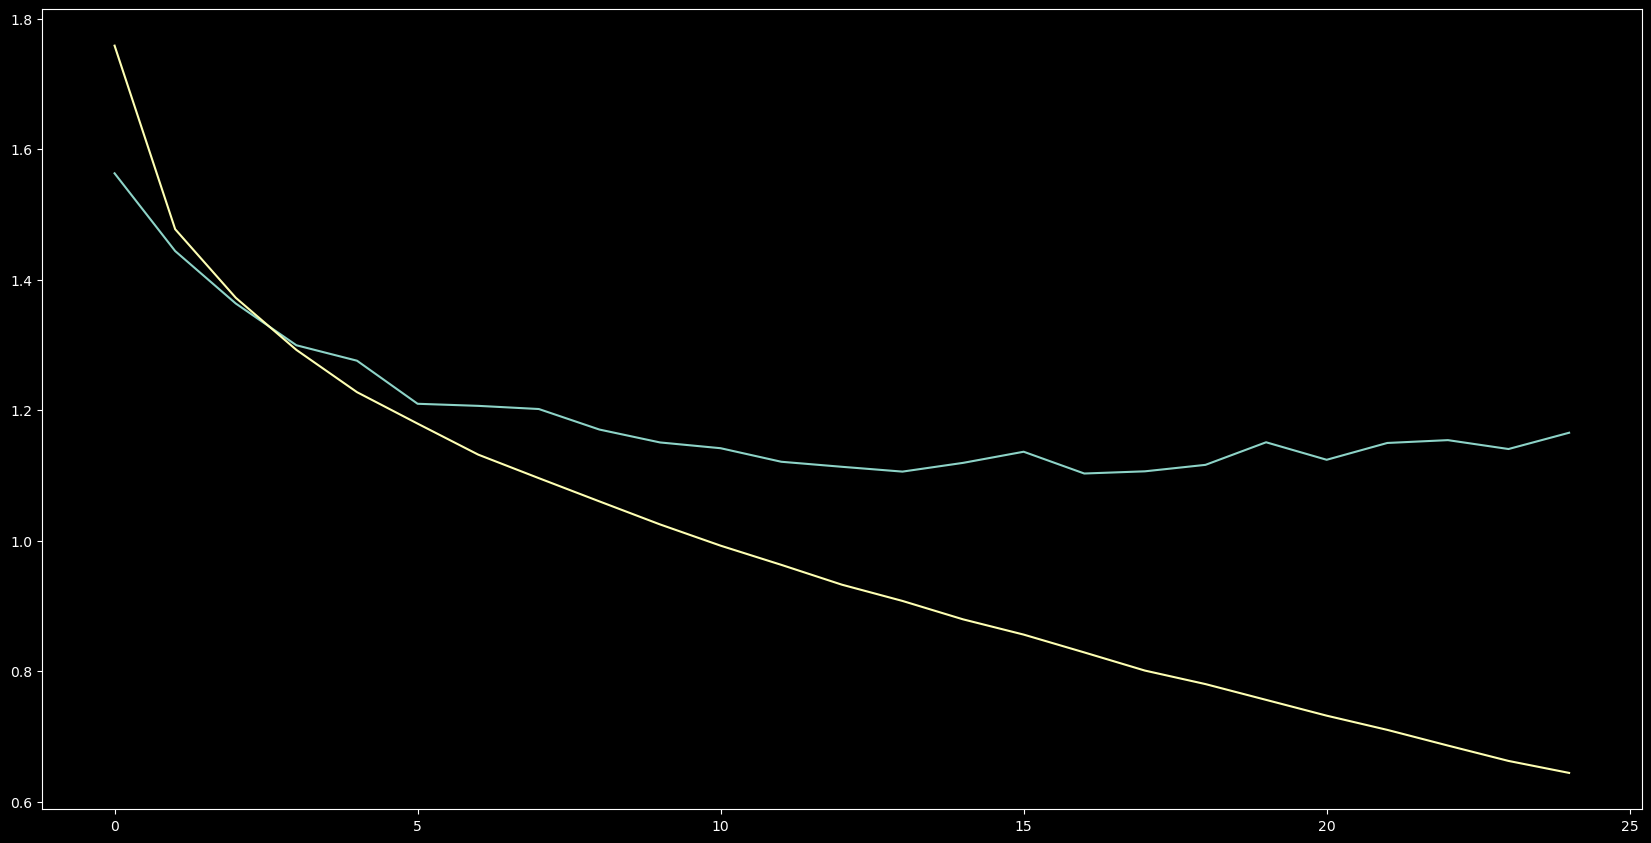

In [15]:
history = best_model.history


fig = plt.figure(figsize=(16, 8))

ax = fig.add_axes(rect=(0,0,1,1))

ax.plot(history.history['val_loss'])
ax.plot(history.history['loss'])